In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

sns.set_theme()

In [2]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")
    
    


In [3]:
#we import a couple of important scripts we are going to use in this notebook

from univariate import Univariate,readCSV
from loaddata import ReadData

In [4]:


%run ../scripts/loaddata.py

Displaying the first 5 rows of the dataset
Reading the data....
successfully read the dataset...
              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL

In [5]:
dataRead=ReadData('../data/Week1_challenge_data_source.xlsx')
data=dataRead.readData()

Reading the data....
successfully read the dataset...


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
#we also define a couple of utility functions we shall use

def groupCol(col,thresh):
    
    print(data.groupby(col)['IMEI'].nunique().sort_values(ascending=False)[:thresh])  
    fig, ax = plt.subplots(figsize=(15,7))
    plt.title("This is the top {} {} in the datset".format(thresh,col))
    data.groupby(col)['IMEI'].nunique().sort_values(ascending=False)[:thresh].plot(ax=ax,kind='bar')
#     sns.countplot(y=data[col],order=data[col].value_counts().iloc[:thresh].index)
#     plt.xticks(rotation=90)
    
sns.set_palette("pastel")

def vizHist(datar,col,c):
  # plt.figure(figsize=(10,8))
  sns.histplot(x=datar[col],bins=40 , palette='rocket' ,kde=True )
  plt.title("Histogram of {}".format(col), fontsize=20)
  plt.ylabel('Frequency')
  plt.xlabel(col)
  plt.show()
  # plt.figure(figsize=(10,8))
  plt.title("Boxplot of {}".format(col))
  sns.boxplot(datar[col],palette='mako')    
    

    

Handset Type
Huawei B528S-23A                10638
Apple iPhone 6S (A1688)          6765
undefined                        6716
Apple iPhone 6 (A1586)           6271
Apple iPhone 7 (A1778)           4721
Apple iPhone Se (A1723)          3764
Apple iPhone 8 (A1905)           3550
Samsung Galaxy S8 (Sm-G950F)     3275
Apple iPhone Xr (A2105)          3077
Samsung Galaxy J5 (Sm-J530)      2760
Name: IMEI, dtype: int64


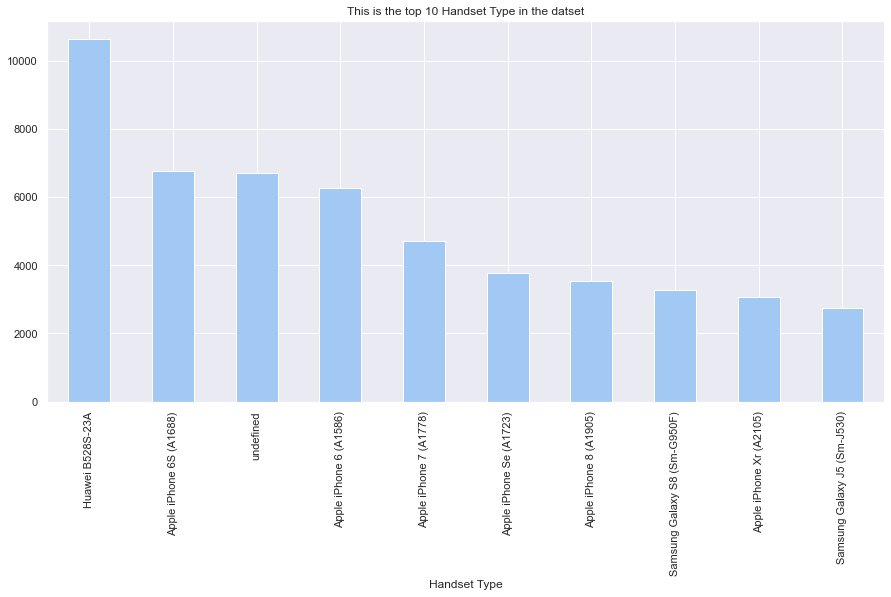

In [8]:
groupCol('Handset Type',10)

**The Market Share of the Phones**

To calulate this we use the IMEI which is a unique equipment identiier, to accurately know how many unique devices are accessing the internet. We then group them according to the manufacturer.

The handset market for mobile phone is dominated by the Huawei B528S-23A which is actually a wifi router. Thus suggesting that mainly people were accessing the resources from a wifi hotspot.This population is actually quite large as it caters for 10638 people which is  almost twice to its clossests compettitor.  

We can thus states that the Apple iPhone6s is the most used hand held deive (phone) that was used to access the internet. Apple seems to have dominated the market having manufactured 7 out of the top ten devices.  

Handset Manufacturer
Apple      42687
Samsung    30981
Huawei     21743
Name: IMEI, dtype: int64


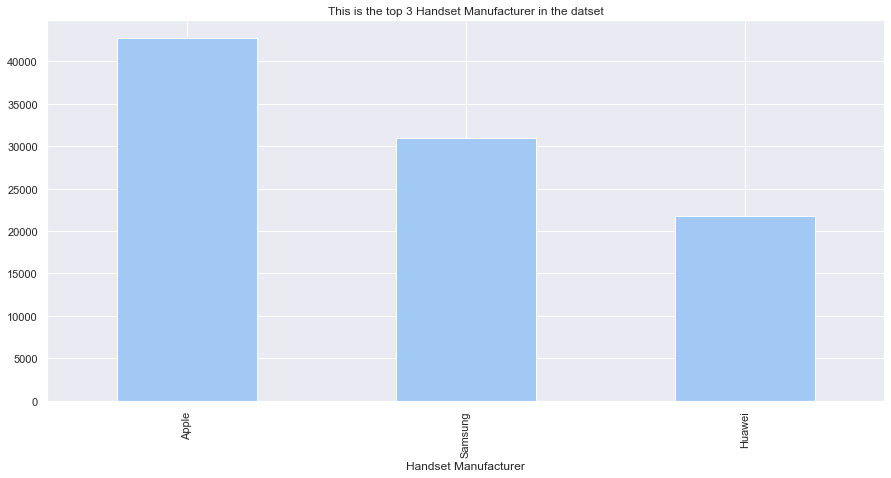

In [9]:
groupCol('Handset Manufacturer',3)

**Manufacurers Market Share**

The market share among the top 3 companies is almost spread, Apple leads with 42,687 devices while samsung holds 30,981 devices.
Most people use the apple products it shows 

In [10]:
"""
Now we find out the top 5 handsets from the top 3 manufacturers

Fist we identify the top 3 manufacturers
Then we create a subset of data of only records that belong to the respective manufacturers
We then group them by manufacturer and type and get the top 5
"""

manufacturers=['Apple','Samsung','Huawei']
top3=data.loc[data['Handset Manufacturer'].isin(manufacturers)]
print(top3.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().groupby(level=0).head(5))

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

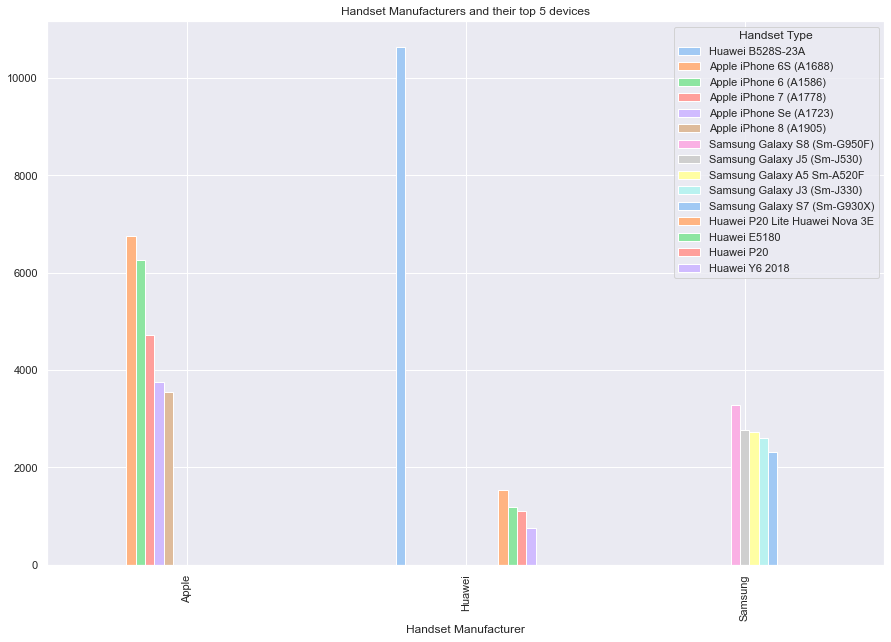

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Handset Manufacturers and their top 5 devices")
top3.groupby(['Handset Manufacturer','Handset Type'])['IMEI'].nunique().sort_values(ascending=False).groupby(level=0).head(5).unstack().plot(ax=ax,kind='bar')

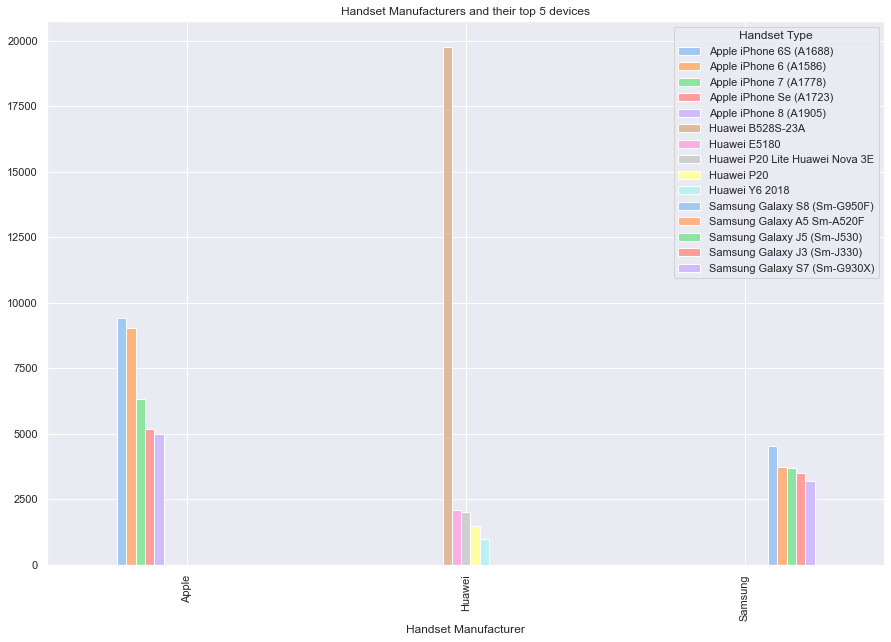

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Handset Manufacturers and their top 5 devices")
top3.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().groupby(level=0).head(5).unstack().plot(ax=ax,kind='bar')

We calculate the number of sessions each user has had. A user is identified using a unique identifier (MSISDN/Number) hence we aggregate it with the Id of each session to get the number of seesion per user

In [13]:
userData=data.groupby(['MSISDN/Number'])['Bearer Id'].nunique().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['No of xDR sessions']
userData

,No of xDR sessions
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
...,...
3.366066e+10,1
3.366066e+10,1
3.366066e+10,1


In [14]:
userData=data.groupby(['MSISDN/Number'])['Dur. (ms)'].sum().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['Total Session Duration']
userData

,Total Session Duration
MSISDN/Number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
...,...
3.365043e+10,7267.0
3.369839e+10,7258.0
3.365933e+10,7189.0


In [15]:
data.groupby(['MSISDN/Number']).agg({'Total DL (Bytes)':sum,'Total UL (Bytes)':sum})

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197021e+12,1.948281e+08,37295915.0


In [16]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media DL (Bytes)':sum,
    'Social Media UL (Bytes)':sum,
    'Google DL (Bytes)':sum,
    'Google UL (Bytes)':sum,
    'Email DL (Bytes)':sum,
    'Email UL (Bytes)':sum,
    'Youtube DL (Bytes)':sum,
    'Youtube UL (Bytes)':sum,
    'Netflix DL (Bytes)':sum,
    'Netflix UL (Bytes)':sum,
    'Gaming DL (Bytes)':sum,
    'Gaming UL (Bytes)':sum,
    'Other DL (Bytes)':sum,
    'Other UL (Bytes)':sum
    })

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


In [17]:
data['Social Media Total (Bytes)']=data['Social Media DL (Bytes)']+data['Social Media UL (Bytes)']
data['Google Total (Bytes)']=data['Google DL (Bytes)']+data['Google UL (Bytes)']
data['Email Total (Bytes)']=data['Email DL (Bytes)']+data['Email UL (Bytes)']
data['Youtube Total (Bytes)']=data['Youtube DL (Bytes)']+data['Youtube UL (Bytes)']
data['Netflix Total (Bytes)']=data['Netflix DL (Bytes)']+data['Netflix UL (Bytes)']
data['Gaming Total (Bytes)']=data['Gaming DL (Bytes)']+data['Gaming UL (Bytes)']
data['Other Total (Bytes)']=data['Other DL (Bytes)']+data['Other UL (Bytes)']


In [18]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,8.814393e+06,36749741.0,308879636.0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.505514e+07,53800391.0,653384965.0,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4.215763e+06,27883638.0,279807335.0,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.279728e+07,43324218.0,846028530.0,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.391032e+07,38542814.0,569138589.0,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.348742e+07,57628851.0,574175259.0,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.457758e+06,39135081.0,666648844.0,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.131473e+07,34912224.0,592786405.0,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.406930e+06,29626096.0,371895920.0,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


In [19]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media Total (Bytes)':sum,
    
    'Google Total (Bytes)':sum,
    
    'Email Total (Bytes)':sum,
    
    'Youtube Total (Bytes)':sum,
   
    'Netflix Total (Bytes)':sum,
   
    'Gaming Total (Bytes)':sum,
    
    'Other Total (Bytes)':sum,
 
    })

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0


In [20]:
from eda import EDA

edaCon=EDA(data)
missinPerc=edaCon.calculateMissingValues()
missinPerc


,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,1.0,0.000667
Start ms,1.0,0.000667
End,1.0,0.000667
End ms,1.0,0.000667
...,...,...
Email Total (Bytes),0.0,0.000000
Youtube Total (Bytes),0.0,0.000000
Netflix Total (Bytes),0.0,0.000000
Gaming Total (Bytes),0.0,0.000000


In [21]:
#We drop the values that have more than 50% null values as this will affect our data insughts

datar=edaCon.dropDuplicates()

Dropping Duplicates...

There are 0  duplicates in the dataset
Done Dropping duplicates!


In [22]:
datat=data.copy()

In [23]:
edaCon.aboveThresholdMissing(.50)
missinReport=edaCon.calculateMissingValues()
missinReport

,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,1.0,0.000667
Start ms,1.0,0.000667
End,1.0,0.000667
End ms,1.0,0.000667
Dur. (ms),1.0,0.000667
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [24]:
catCols=['Handset Manufacturer','Handset Type','Last Location Name','IMSI','MSISDN/Number','IMEI']
numeCols=['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Activity Duration DL (ms)','Activity Duration UL (ms)','Dur. (ms).1','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','Social Media DL (Bytes)','Social Media DL (Bytes)',
    'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Social Media Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Youtube Total (Bytes)','Netflix Total (Bytes)','Gaming Total (Bytes)','Other Total (Bytes)']

In [25]:
#we are now going to impute the numericalCols with the Mean
for columns in numeCols:
    edaCon.imputeColumnsMean(columns)

Imputing missing rows of Start column with mean values of the feature
Done......!!!
Imputing missing rows of Start ms column with mean values of the feature
Done......!!!
Imputing missing rows of End column with mean values of the feature
Done......!!!
Imputing missing rows of End ms column with mean values of the feature
Done......!!!
Imputing missing rows of Dur. (ms) column with mean values of the feature
Done......!!!
Imputing missing rows of Avg RTT DL (ms) column with mean values of the feature
Done......!!!
Imputing missing rows of Avg RTT UL (ms) column with mean values of the feature
Done......!!!
Imputing missing rows of Avg Bearer TP DL (kbps) column with mean values of the feature
Done......!!!
Imputing missing rows of Avg Bearer TP UL (kbps) column with mean values of the feature
Done......!!!
Imputing missing rows of DL TP < 50 Kbps (%) column with mean values of the feature
Done......!!!
Imputing missing rows of 50 Kbps < DL TP < 250 Kbps (%) column with mean values of t

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [27]:
#They have been imputed to so no we impute the categorical columns
edaCon.calculateMissingValues()

,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,0.0,0.000000
Start ms,0.0,0.000000
End,0.0,0.000000
End ms,0.0,0.000000
Dur. (ms),0.0,0.000000
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [28]:
for columns in catCols:
    edaCon.imputeColumnsMode(columns)

Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!


In [29]:
#They have been imputed to so no we impute the categorical columns
edaCon.calculateMissingValues()

,Total Missing,Percentage Missing
Bearer Id,0.0,0.0
Start,0.0,0.0
Start ms,0.0,0.0
End,0.0,0.0
End ms,0.0,0.0
Dur. (ms),0.0,0.0
IMSI,0.0,0.0
MSISDN/Number,0.0,0.0
IMEI,0.0,0.0
Last Location Name,0.0,0.0


# Univariate Analysis on Columns

In [30]:
from univariate import Univariate


uniAnalysis=Univariate(data)

## Duration 

### Basic Metrics

In [31]:
uniAnalysis.calculateMetrics('Dur. (ms)')

Reading data
Done
Calculating the univariate metrics of the columns Dur. (ms)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,104608.560347
Mode,[86399.0]
Median,86399.0
Skew,3.952582
Kurtosis,37.02118
Standard deviation,81037.08123
Variance,6567008534.276449


On avearge users xDr sessions were 104608.560347 milliseconds long(1046.0 seconds) 

Most of the user spent 86399.0 milliseconds on their sessions 

The column is highly positively skewed(LeptoKurtic) with a skew value of 3.9 . This depicts a longer right tail, this also indicates that most of the values lie in the left hand side of the median value.(More people spent less time than the median duration)

The column has excess kuertosis of 37. This illustrates heavy tails on both ends which implies high number of outliers. 

### Descriptive Analysis

In [32]:
#fix the values in the column to reflect seconds for easier reading 
data['Dur. (ms).1']=data['Dur. (ms)'].apply(lambda x: x/100)

In [33]:
uniAnalysis.calculateDispersion('Dur. (ms).1')

Calculating dispersion stats for Dur. (ms).1
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,574.420000
Q2,863.990000
Q3,1324.300000
Std deviation,810.370812
IQR,749.880000
Max Value,18593.360000
Min Value,71.420000


The Quatile Statistics for the variable show that:
1. 25% of the users spent less than 574.4 seconds on the internet
2. 50% of the users spent 863 seconds or more on the internet
3. 75% of users spent less than 1324.3 seconds and only 25% spent more than 1324.3 seconds there

The standard Devition from the mean is 810 hence most of the data lies between +-810 sconds from the mean 

* The max duration sent on a session was 18593.36 

In [34]:
uniAnalysis.calculateMetrics('Dur. (ms).1')

Reading data
Done
Calculating the univariate metrics of the columns Dur. (ms).1
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,1046.085603
Mode,[863.99]
Median,863.99
Skew,3.952582
Kurtosis,37.02118
Standard deviation,810.370812
Variance,656700.853428


### Graphical Representation

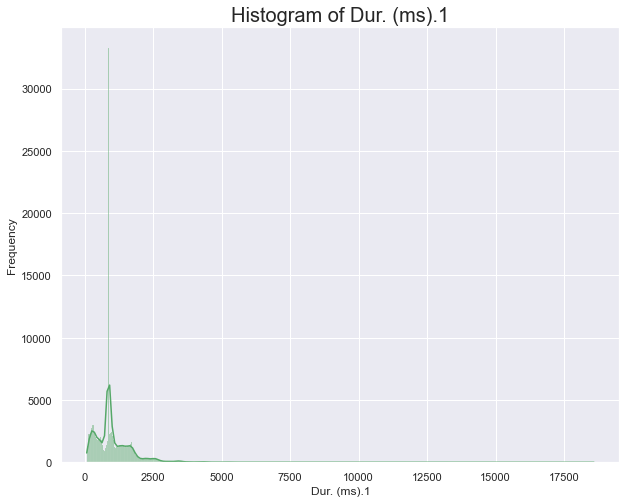

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


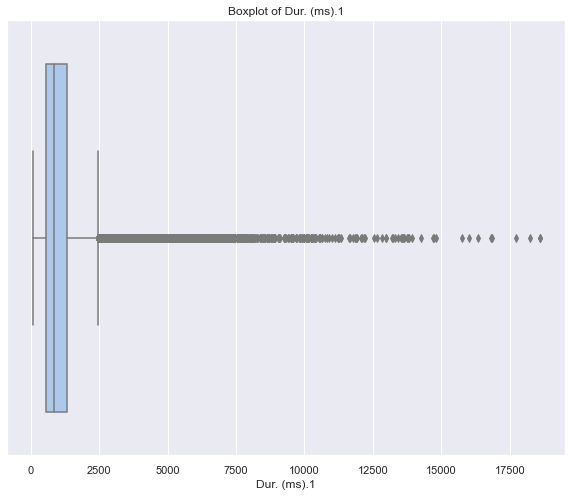

In [35]:
uniAnalysis.vizualiseHist('Dur. (ms).1','g')

The visualization plot supports the figrures in the histogram we see alonger right tail which is due to the positive skew nature of the column, this also idnicates a heavy(long tail) which can also be seen in the presence of numerous outliers in the boxplot .

The outliers are mainly focused on the right hand side of the mean

## Start / End

In [36]:
data['Start']=pd.to_datetime(data['Start'])
data['End']=pd.to_datetime(data['End'])

In [37]:
def convertMonth(data,cols,newCols):
    data[newCols]=pd.DatetimeIndex(data[cols]).month
def convertDay(data,cols,newCols):
    data[newCols]=pd.DatetimeIndex(data[cols]).day
    
def convertYear(data,cols,newCols):
    data[newCols]=pd.DatetimeIndex(data[cols]).year
def convertHour(data,cols,newCols):
    data[newCols]=pd.DatetimeIndex(data[cols]).hour    
    
    
convertMonth(data,'Start','Month')
convertDay(data,'Start','Day')
convertYear(data,'Start','Year')
convertHour(data,'Start','Hour')

    

    

In [38]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Month,Day,Year,Hour
0,13114483460844900352,2019-04-04 12:01:18.000000000,770.0000,2019-04-25 14:35:31.000000000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,4,4,2019,12
1,13114483482878900224,2019-04-09 13:04:04.000000000,235.0000,2019-04-25 08:15:48.000000000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,4,9,2019,13
2,13114483484080500736,2019-04-09 17:42:11.000000000,1.0000,2019-04-25 11:58:13.000000000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,4,9,2019,17
3,13114483485442799616,2019-04-10 00:31:25.000000000,486.0000,2019-04-25 07:36:35.000000000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,4,10,2019,0
4,13114483499480700928,2019-04-12 20:10:23.000000000,565.0000,2019-04-25 10:40:32.000000000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,4,12,2019,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,4,29,2019,7
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,4,29,2019,7
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,4,29,2019,7
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,4,29,2019,7


Creation of Month,Day and Year columns gives as a leeway to affectively analyse the time series of the sessions. We discover that this data was collected over the month of April 2019. 

In [39]:
uniAnalysis.calculateMetrics('Hour')

Reading data
Done
Calculating the univariate metrics of the columns Hour
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,10.088513
Mode,[7]
Median,9.0
Skew,0.251087
Kurtosis,-1.137746
Standard deviation,6.421798
Variance,41.239484


The stats from reviewing the column shows that people mainly accessed the sessions at 7 am in the morning.
The distribution is almost normally distributed due to skewness value being .25 hence sessions were almost evenly distributed out over the whole day. 

The negative kurtosis(platykurtic) suggest a flat tail on the ends and fewer outliers

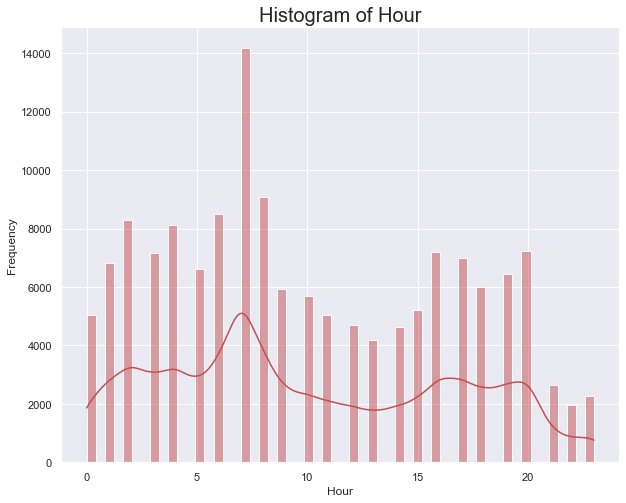

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


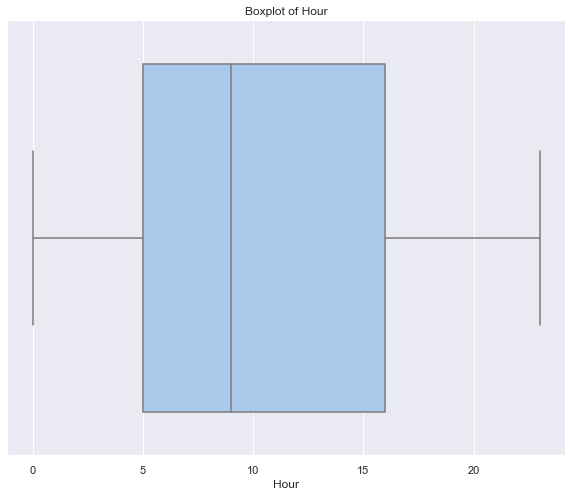

In [40]:
uniAnalysis.vizualiseHist('Hour','r')

In [41]:
uniAnalysis.calculateMetrics('Day')

Reading data
Done
Calculating the univariate metrics of the columns Day
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,26.084326
Mode,[27]
Median,26.0
Skew,-0.389769
Kurtosis,1.410845
Standard deviation,1.777814
Variance,3.160621


The day with the highest session traffic was the 27 day of April. 
The data is negatively skewed and hence will have a longer left tail suggesting that most of the values lie after the median, this interprates to more session time in the final days of April.


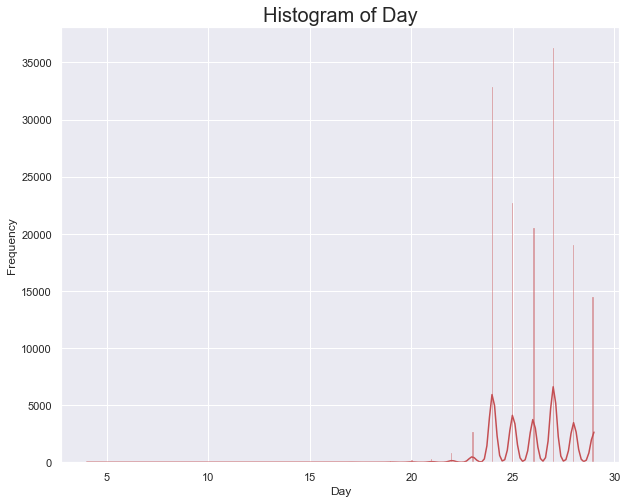

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


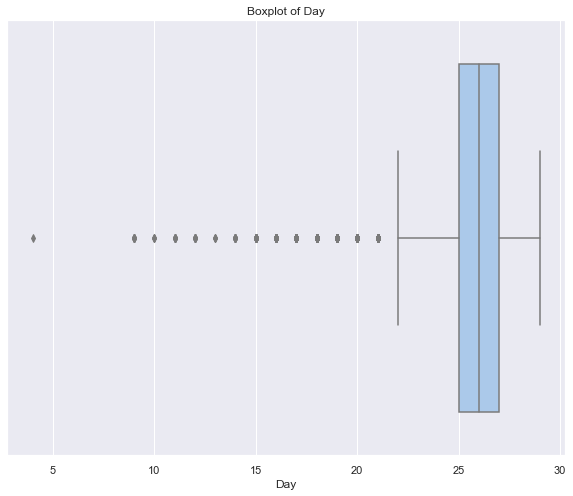

In [42]:
uniAnalysis.vizualiseHist('Day','r')

## MSISDN/Number

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


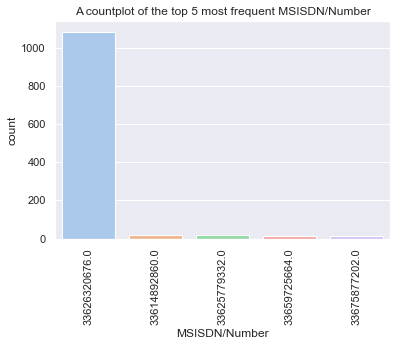

In [43]:
uniAnalysis.visualiseCount('MSISDN/Number',5)

The Graph shows the most frequent users as per their MSISDN/Number the highest has 18 sessions 

## IMEI 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


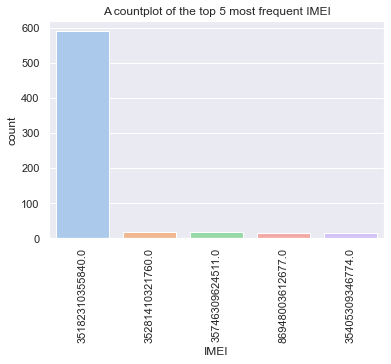

In [44]:
uniAnalysis.visualiseCount('IMEI',5)

The handset with the IMEI number has been used the most times to access the sessions this handst probably belongs to the individual with the highest number of sessions as they both have 18 cumilative sessions  

## Location Name

In [45]:
data['Last Location Name'].unique()

array([9164566995485190, 'L77566A', 'D42335A', ..., 'D20434A', 'T51102A',
       'L88342B'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


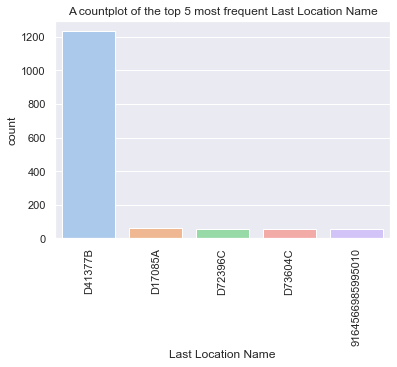

In [46]:
uniAnalysis.visualiseCount('Last Location Name',5)

These are the top 5 locations where users accessed the sessions from. Location code D41377B has about 1200 counts where sessions were accessed from. 

## Total DL of Session

### Basic Metrics

In [47]:
uniAnalysis.calculateMetrics('Total DL (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Total DL (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,454643430.078967
Mode,[74126119.0]
Median,455840911.0
Skew,-0.003153
Kurtosis,-1.198363
Standard deviation,244141246.762547
Variance,59604948370770632.0


**Analysis**

The feature Total DL in Bytes had a mean of 454643430 bytes (454.6Mb) hence on avearge each user's session downloaded 454 mb worth of packets. With a majority of them downloading  74126119 (74.1 Mb) of data. 

The data has a negative skew and hence has a longer left tail and most of the values lie on the right hand side of the median. The negative kurtosis suggest it having a flat tail and also little outliers in this case

With the Standard deviation at 244141246. it interpretes to user sessions downloading +- 244141246 around the mean of 454643430 bytes

### Descriptive Analysis

In [48]:
uniAnalysis.calculateDispersion('Total DL (Bytes)')

Calculating dispersion stats for Total DL (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,2.431072e+08
Q2,4.558409e+08
Q3,6.657051e+08
Std deviation,2.441412e+08
IQR,4.225980e+08
Max Value,9.029696e+08
Min Value,7.114041e+06


1. Only 25% of user sessions had a total bytes downloaded being less than 2.431072e+08 (~243 Mb)
2. 50% of the user sessions downloaded more than and less than 4.558409e+08 (~455 Mb)
3. Only 25% of user sessions downloaded more than 6.657051e+08 Bytes (~665 Mb) of data packets

The highest session downloaded 9.029696e+08 Bytes(902 Mb) worth of data 

### Graphical Representation

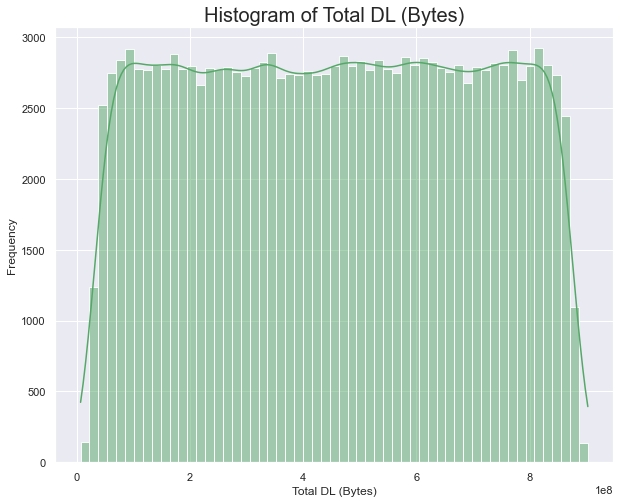

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


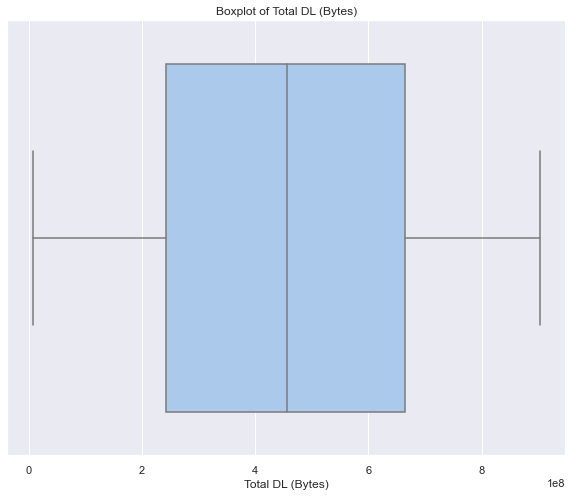

In [49]:
uniAnalysis.vizualiseHist('Total DL (Bytes)','g')

## Total UL Bytes

### Basic Metrics

In [50]:
uniAnalysis.calculateMetrics('Total UL (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Total UL (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,41121206.292107
Mode,[19362459.0]
Median,41143242.0
Skew,-0.002456
Kurtosis,-0.327465
Standard deviation,11276311.33903
Variance,127155197414725.65625


The average Total Upload was 41121206 Bytes ( 41 Mb) significantly smaller than the average downloads.It's safe to say people do more of downloading of content(data packets) than they do upload them. 

The feature is almost normally distributed though it does have slight negative skewness of -.002 the distribution will form a bel curve with median,mean and mode being almost alike.

### Descriptive Metrics

In [51]:
uniAnalysis.calculateDispersion('Total UL (Bytes)')

Calculating dispersion stats for Total UL (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,3.322203e+07
Q2,4.114324e+07
Q3,4.903424e+07
Std deviation,1.127631e+07
IQR,1.581221e+07
Max Value,7.833131e+07
Min Value,2.866892e+06


1. 25% of the user sessions uploaded less than 3.322203e+07 bytes (33 Mb) of data 
2. 50% of the user sessions uplodaed more than 4.114324e+07 bytes (41 Mb) of data
3. Only 25% of the user sessions uploaded more than 4.903424e+07Byts (~50Mb) of data

The std deviation suggest that most of the user sessions uplaoded +-1.127631e+07 (~11Mb) around the mean

The largest upload size was 7.833131e+07 (~78 Mb) significantly smaller than the largest download at 902 Mb

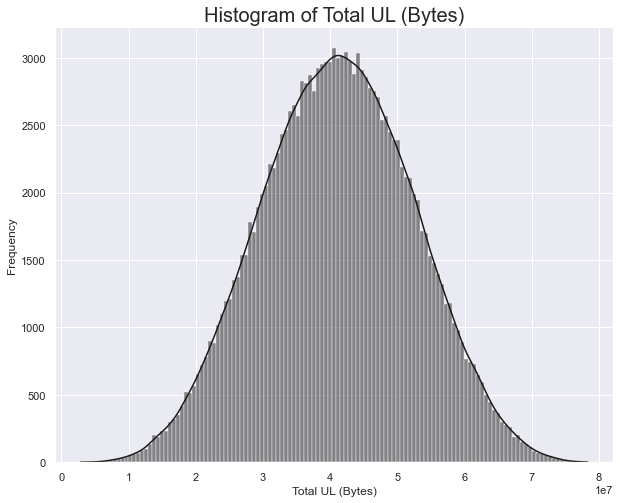

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


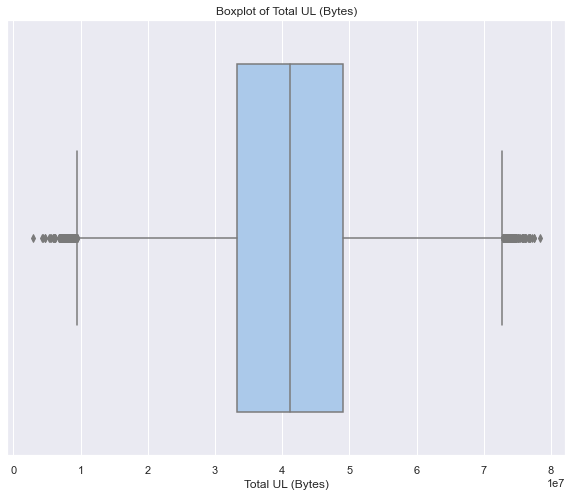

In [52]:
uniAnalysis.vizualiseHist('Total UL (Bytes)','k')

 ## Social Media Total 

### Base Statistics

In [53]:
uniAnalysis.calculateMetrics('Social Media Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Social Media Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,1828250.208027
Mode,[154418.0]
Median,1826471.0
Skew,-0.002121
Kurtosis,-1.202178
Standard deviation,1035642.685868
Variance,1072555772791.031494


The social media platform had an average total data volume of 1828250 bytes (1.8 Mb) 
The distribution of this is almost normally distributed and the negative kurtosis depicts a flat tail and few outliers

In [54]:
uniAnalysis.calculateDispersion('Social Media Total (Bytes)')

Calculating dispersion stats for Social Media Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,9.322180e+05
Q2,1.826471e+06
Q3,2.727487e+06
Std deviation,1.035643e+06
IQR,1.795269e+06
Max Value,3.650861e+06
Min Value,1.563000e+03


1. 25% of the user sessions used less than 9.322180e+05 Bytes (~.9 Mb) of data both upload and download
2. More than 50% of the users used more than 1.826471e+06 Bytes (~18 Mb) data volume
3. Only 25% of customer used more than 2.727487e+06 Bytes (~ 27 Mb) data volume during their session

The user who did use the most data volume was 3.650861e+06 Bytes ( ~36 Mb) of data during their sessions

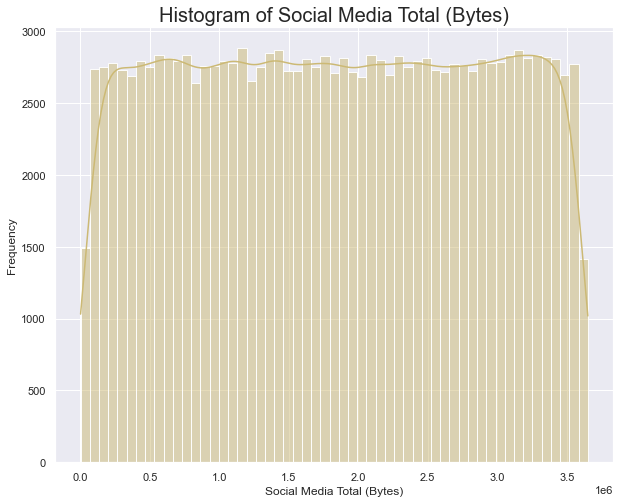

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


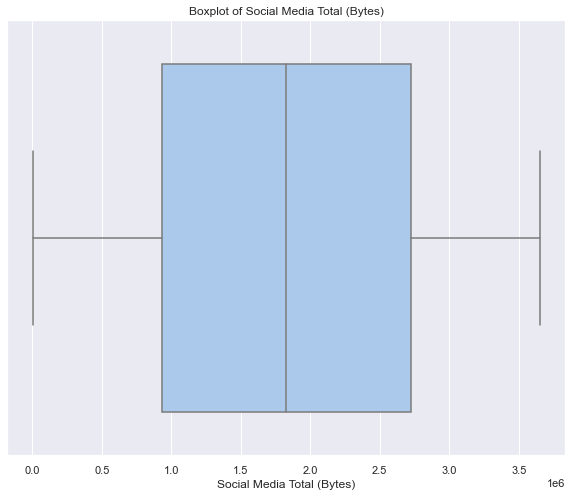

In [55]:
uniAnalysis.vizualiseHist('Social Media Total (Bytes)','y')

## Google Total

In [56]:
uniAnalysis.calculateMetrics('Google Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Google Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,7807294.545573
Mode,[5240092.0]
Median,7812835.0
Skew,-0.010602
Kurtosis,-0.963043
Standard deviation,3516408.516617
Variance,12365128855735.333984


The average combined data volume for Google platform was 7807294 Bytes (~7.8 Mb). This is higher than Social Media platform reflecting that many users used Google as compared to Social Media 

The data also takes a normal distribution though slighly negatively skewed.

In [57]:
uniAnalysis.calculateDispersion('Google Total (Bytes)')

Calculating dispersion stats for Google Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,4.943599e+06
Q2,7.812835e+06
Q3,1.068280e+07
Std deviation,3.516409e+06
IQR,5.739197e+06
Max Value,1.552878e+07
Min Value,4.033000e+04


1. 25% of the users had lower than 4.943599e+06 (~4 Mb) of data volume usage on Google
2. 50% of user had more/ less than 7.812835e+06 (~7 Mb) of data volume usage on Google
3. Only 25% of users had more than  1.068280e+07 (10 Mb) o data volume usage on Google

The highest recorded data volume usage on google was 1.552878e+07 Bytes (15 Mb) with the lowest being 40330 Bytes (~.04Mb) 

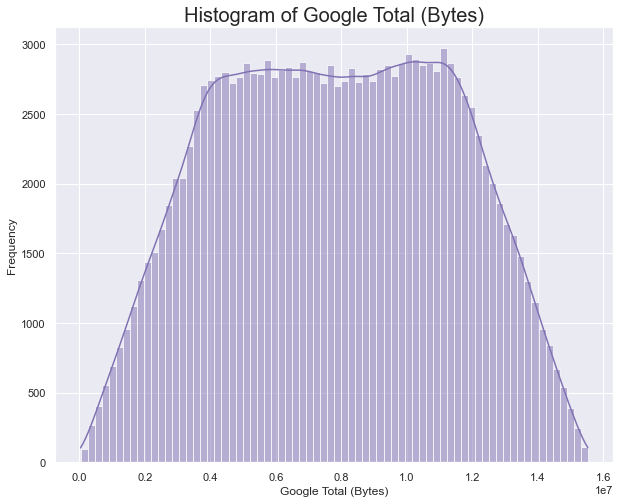

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


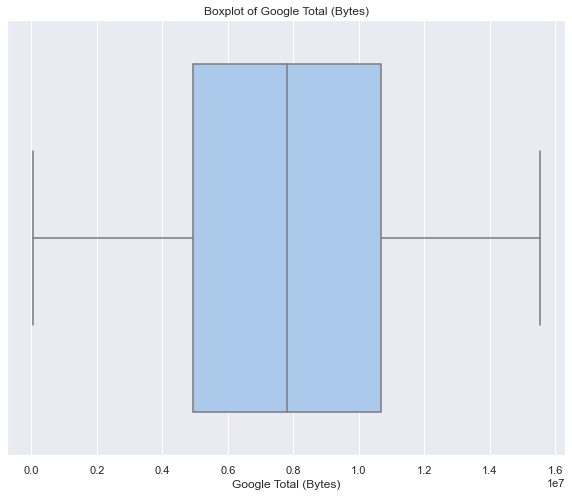

In [58]:
uniAnalysis.vizualiseHist('Google Total (Bytes)','m')

## Email Total

In [59]:
uniAnalysis.calculateMetrics('Email Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Email Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,2259102.30996
Mode,[648993.0]
Median,2263567.0
Skew,-0.006033
Kurtosis,-1.061701
Standard deviation,1071105.490272
Variance,1147266971291.749023


The average combined data usage of Email was 2259102 Bytes (~2.2 Mb) this shows that fewer data requests were done on Email when to compared to google. 


In [60]:
uniAnalysis.calculateDispersion('Email Total (Bytes)')

Calculating dispersion stats for Email Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,1.359344e+06
Q2,2.263567e+06
Q3,3.159818e+06
Std deviation,1.071105e+06
IQR,1.800474e+06
Max Value,4.518036e+06
Min Value,8.359000e+03


1. 25% of cutomers used less than 1.359344e+06 Bytes (~1.3 Mb) of data volume on Email
2. 50% of cusomer used more than/ less than 2.263567e+06 (~ 2.2 Mb) of data volume on Emails
3. Only 25% of cutomers had more than 3.159818e+06 Bytes (~3.5 Mb) of data volume used on Email platforms

With the standard deviation of 1.0 Mb it interprates to data usage being +- 1.0Mb around the mean 

The highest data volume usage on Emails was 4.5 Mb with the lowest being at .008Mb on Emails 

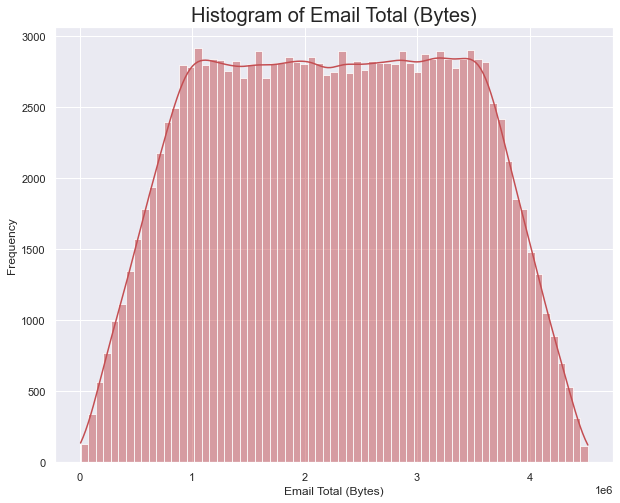

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


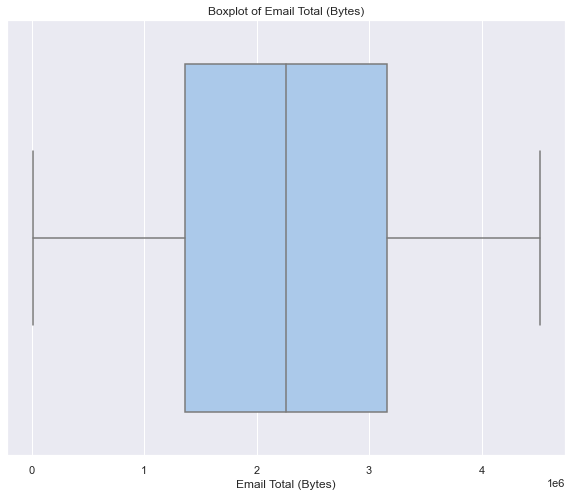

In [61]:
uniAnalysis.vizualiseHist('Email Total (Bytes)','r')

## YouTube Totals

In [62]:
uniAnalysis.calculateMetrics('Youtube Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Youtube Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,22643482.6386
Mode,[18836800.0]
Median,22661770.0
Skew,-0.005465
Kurtosis,-0.604644
Standard deviation,9246769.484043
Variance,85502745891037.921875


The average combined data volume usage on Youtube platform is 22643482.6386 Bytes (22 Mb ) this is higher than the previous platforms. This can be accrdited to it being a video streaming platform and hence would be data demanding.



In [63]:
uniAnalysis.calculateDispersion('Youtube Total (Bytes)')

Calculating dispersion stats for Youtube Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,1.599846e+07
Q2,2.266177e+07
Q3,2.929260e+07
Std deviation,9.246769e+06
IQR,1.329414e+07
Max Value,4.519008e+07
Min Value,7.890300e+04


1. Less than 25% of people used lower than 1.599846e+07 Bytes (~15 Mb) of data volume while on Youtube 
2. 50% of the people used more than 2.266177e+07 Bytes of data on Youtube platform
3. Only 25% of the population used more than 2.929260e+07 (~29 Mb) of data on youtube

The highest data volume usage on youtbe was at 45 Mb while the lowest was .07Mb 

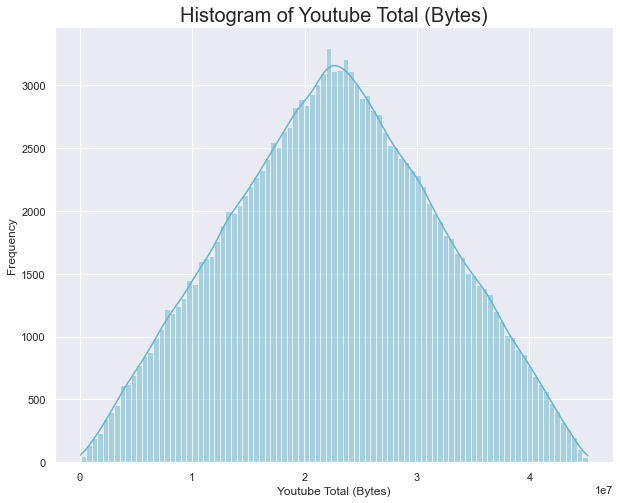

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


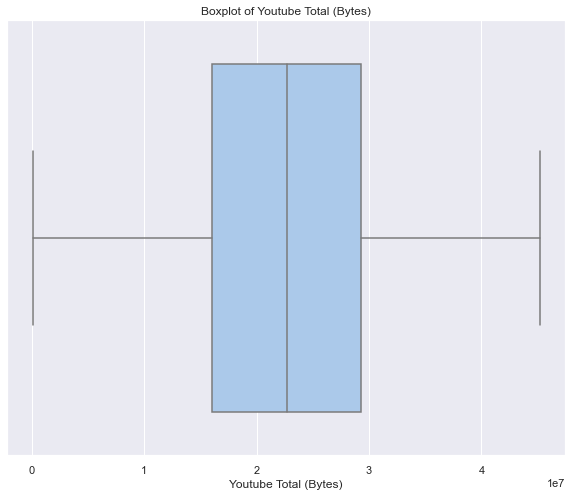

In [64]:
uniAnalysis.vizualiseHist('Youtube Total (Bytes)','c')

## Netflix Totals

In [65]:
uniAnalysis.calculateMetrics('Netflix Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Netflix Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,22628606.53838
Mode,[3192097.0]
Median,22635545.0
Skew,-0.000409
Kurtosis,-0.608492
Standard deviation,9260789.216948
Variance,85762216920746.9375


The average combined data volume usage on Netflix is 22628606.53838 Bytes (~22Mb) which is also similar to that of Youtub as both as video streaming services and are rather demanding

In [66]:
uniAnalysis.calculateDispersion('Netflix Total (Bytes)')

Calculating dispersion stats for Netflix Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,1.597946e+07
Q2,2.263554e+07
Q3,2.929044e+07
Std deviation,9.260789e+06
IQR,1.331099e+07
Max Value,4.519815e+07
Min Value,9.843200e+04


1. 25% of the customers use less than 15 Mb of data while accessing Netflix
2. 50% of the customers use more than 22 Mb of data packets while on the Netflix platform
3. 25% of the customers used more than 29 Mb 

The highest recorded combined data volume usage on Netflix was 45 Mb while the least was .09 Mb

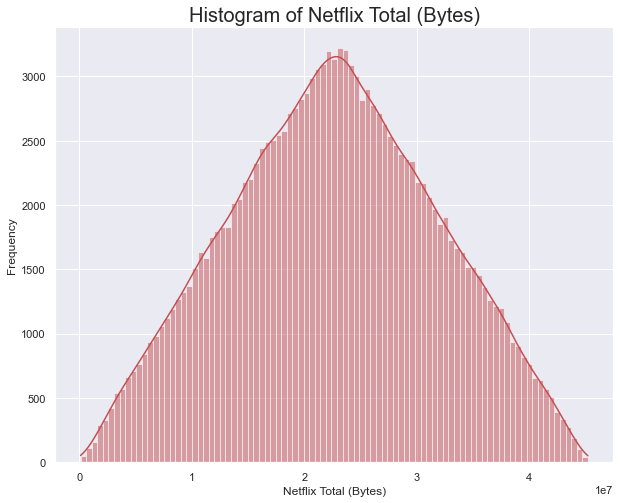

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


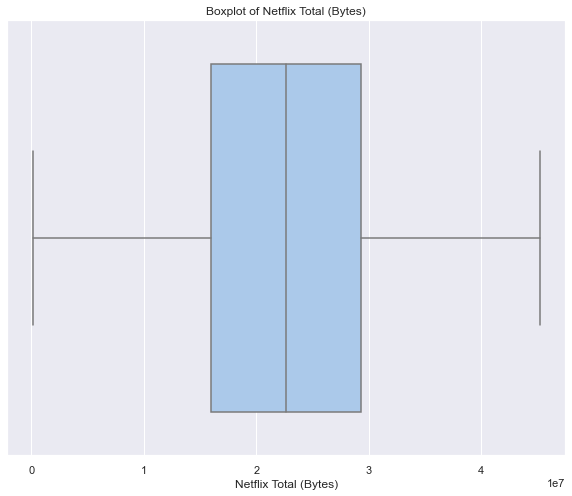

In [67]:
uniAnalysis.vizualiseHist('Netflix Total (Bytes)','r')

## Gaming Total

In [68]:
uniAnalysis.calculateMetrics('Gaming Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Gaming Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,430333100.706107
Mode,[15151281.0]
Median,431614977.0
Skew,-0.003225
Kurtosis,-1.202256
Standard deviation,244019110.62485
Variance,59545326350142760.0


The avrage combined data volume on The Gaming platforms is 430333100.706107 Bytes (~430 Mb) this is the current highest data usage this can be accredited to the intensive nature of live/ online game streaming which reuqires lots of data.

In [69]:
uniAnalysis.calculateDispersion('Gaming Total (Bytes)')

Calculating dispersion stats for Gaming Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,2.187279e+08
Q2,4.316150e+08
Q3,6.414159e+08
Std deviation,2.440191e+08
IQR,4.226879e+08
Max Value,8.592028e+08
Min Value,3.063580e+05


1. Only 25% of the customers used less than 2.187279e+08 Bytes (218 Mb) while Gaming
2. With 50% of them using more than 4.316150e+08 Bytes (431 Mb) of data
3. 25% of the customers used more than 6.414159e+08 (641 Mb) of data while gaming as well 

The highest recorded data usage was 859 Mb while the least was .3 Mb  

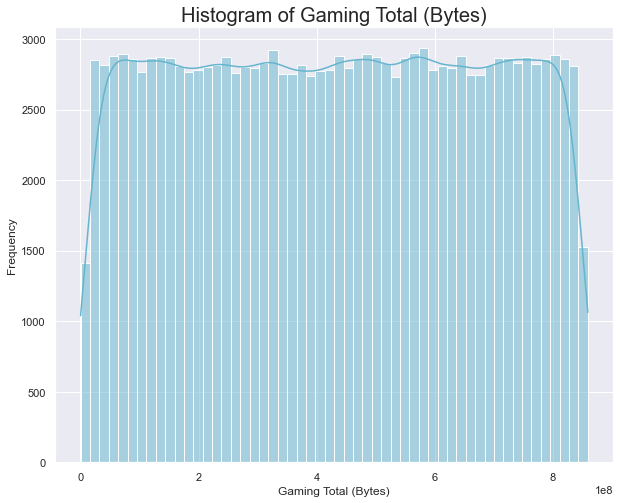

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


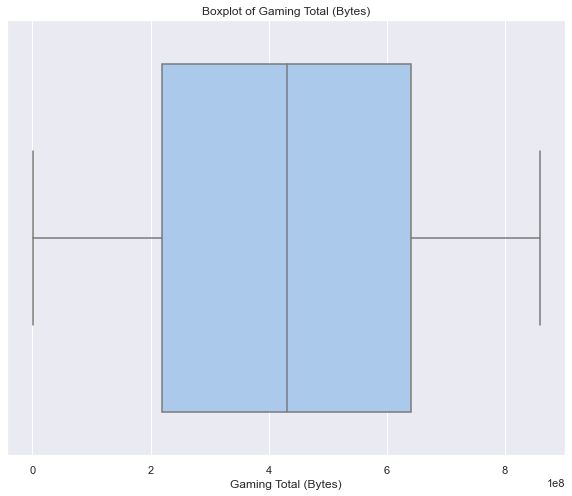

In [70]:
uniAnalysis.vizualiseHist('Gaming Total (Bytes)','c')

## Other Total

In [71]:
uniAnalysis.calculateMetrics('Other Total (Bytes)')

Reading data
Done
Calculating the univariate metrics of the columns Other Total (Bytes)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,429365343.61892
Mode,[54037059.0]
Median,429986492.0
Skew,0.001256
Kurtosis,-1.196015
Standard deviation,243267262.402083
Variance,59178960956604120.0


The combined data volume average of other pltaforms used by the customers stands at 429365343.61892 Bytes (~429 Mb) of data.

With a platkurtic kurtosis it depicts flat tails with minimal outliers

In [72]:
uniAnalysis.calculateDispersion('Other Total (Bytes)')

Calculating dispersion stats for Other Total (Bytes)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,2.185534e+08
Q2,4.299865e+08
Q3,6.399275e+08
Std deviation,2.432673e+08
IQR,4.213741e+08
Max Value,8.595209e+08
Min Value,1.490450e+05


1. 25% of the customers used less than 218 Mb on other platforms
2. More than 50% of customers used more than 429 Mb on other platforms
3. 25% of users had more than 639 Mb of data volume on other platforms

The highest recorded data volume was 859 Mb with the least being .14Mb 

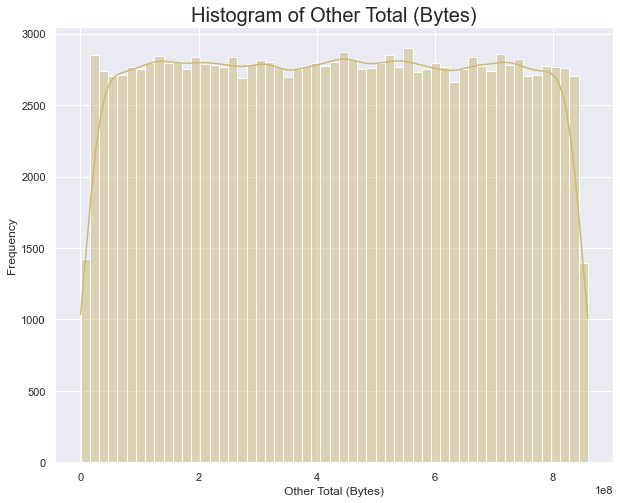

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


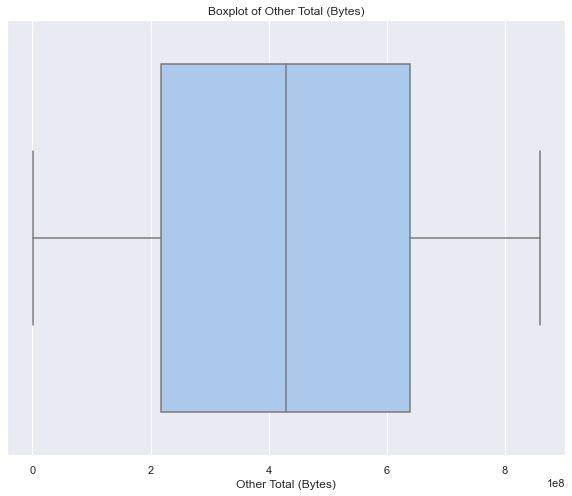

In [73]:
uniAnalysis.vizualiseHist('Other Total (Bytes)','y')

## Avg RTT DL (Average Round Trip Time measurement Downlink direction (msecond))

In [74]:
uniAnalysis.calculateMetrics('Avg RTT DL (ms)')

Reading data
Done
Calculating the univariate metrics of the columns Avg RTT DL (ms)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,109.795706
Mode,[109.79570605376027]
Median,54.0
Skew,69.704464
Kurtosis,8805.394317
Standard deviation,559.340755
Variance,312862.080453


The avearge time taken for a round Trip Time measurement Downlink was 109 ms which fairly good. Good RTT should be less than 100 ms. 
The distribution is highly positively skewed and hence a longer right tail, most of the values are on the left hands side (lower than) the median value.

The kurtosis is high as well hence leptokurtic this indicates long tails and equally large number of outliers

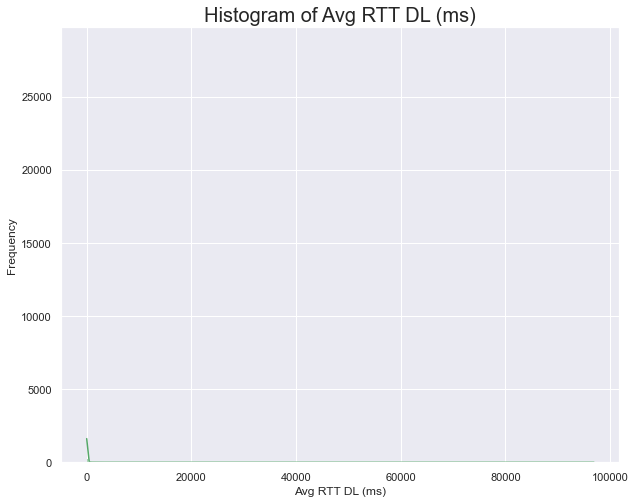

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


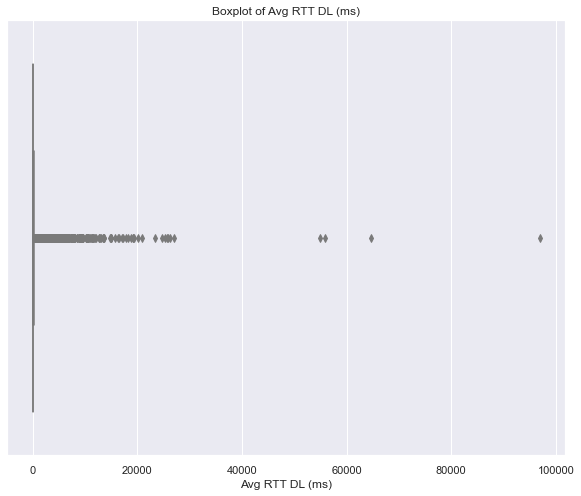

In [75]:
uniAnalysis.vizualiseHist('Avg RTT DL (ms)','g')

### Descriptive Analysis

In [76]:
uniAnalysis.calculateDispersion('Avg RTT DL (ms)')

Calculating dispersion stats for Avg RTT DL (ms)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,35.000000
Q2,54.000000
Q3,109.795706
Std deviation,559.340755
IQR,74.795706
Max Value,96923.000000
Min Value,0.000000


1. 25% of the sessions had less than 35 mseconds of RTT which is very impressive Time, hence very low latency
2. 50% of the sessions had below 54 mseconds of RTT which is also a comendable speed
3. 25% of the population had above 109 ms of RTT which is fair

The largest RTT Time was 96923 which translate to a high repsonse time and lots of latency.

*was probably was using internet explorer on Zuku Wifi huh? :)*

## Avg RTT DL (Average Round Trip Time measurement Uplink direction (msecond))

In [77]:
uniAnalysis.calculateMetrics('Avg RTT UL (ms)')

Reading data
Done
Calculating the univariate metrics of the columns Avg RTT UL (ms)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,17.662883
Mode,[17.662882910900326]
Median,7.0
Skew,31.529794
Kurtosis,1632.591571
Standard deviation,76.529678
Variance,5856.791618


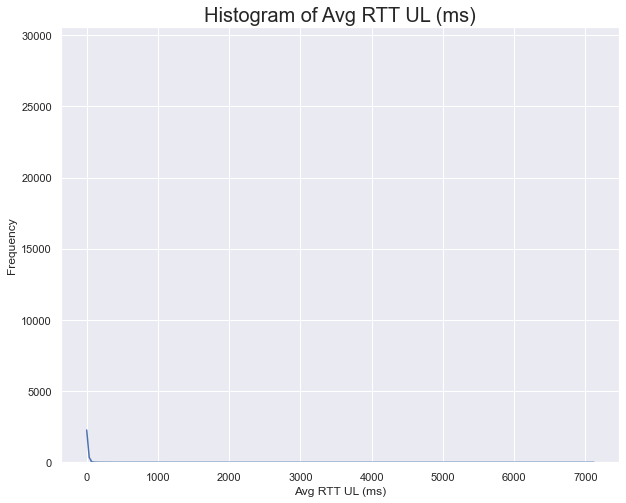

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


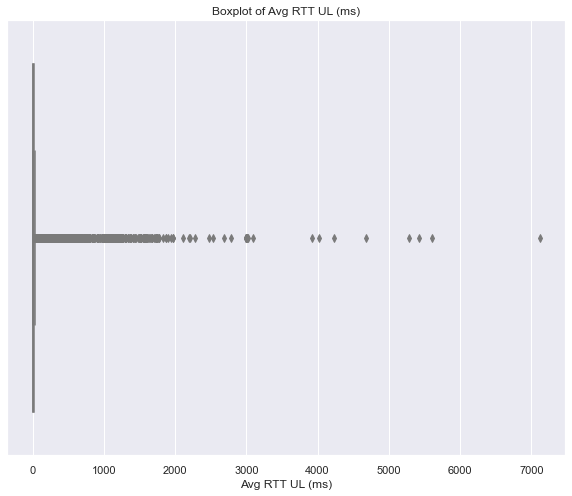

In [78]:
uniAnalysis.vizualiseHist('Avg RTT UL (ms)','b')

### Descriptive Analysis

In [79]:
uniAnalysis.calculateDispersion('Avg RTT UL (ms)')

Calculating dispersion stats for Avg RTT UL (ms)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,3.000000
Q2,7.000000
Q3,17.662883
Std deviation,76.529678
IQR,14.662883
Max Value,7120.000000
Min Value,0.000000


Upload speed seem to be faster than the download speeds due to a generally lower RTT on the Avg RTT. The longest Upload RTT was 7120 mseconds

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

## Average Bearer Throughput for Downlink (kbps)

In [81]:
data['Avg Bearer TP DL (Mbps)']=data['Avg Bearer TP DL (kbps)'].apply(lambda x:x/1024)
data['Avg Bearer TP UL (Mbps)']=data['Avg Bearer TP UL (kbps)'].apply(lambda x:x/1024)

In [82]:
uniAnalysis.calculateMetrics('Avg Bearer TP DL (Mbps)')

Reading data
Done
Calculating the univariate metrics of the columns Avg Bearer TP DL (Mbps)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,12.988326
Mode,[0.0224609375]
Median,0.061523
Skew,2.589419
Kurtosis,9.573332
Standard deviation,23.409882
Variance,548.022555


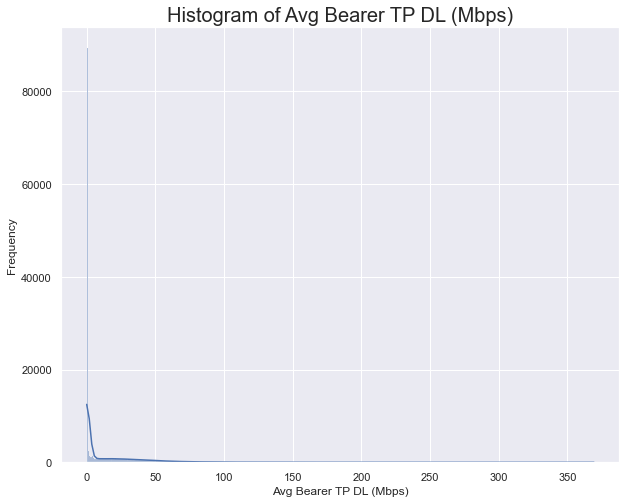

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


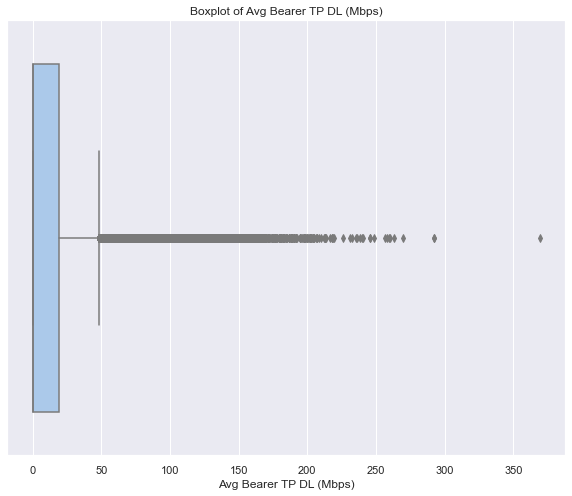

In [83]:
uniAnalysis.vizualiseHist('Avg Bearer TP DL (Mbps)','b')

In [84]:
uniAnalysis.calculateDispersion('Avg Bearer TP DL (Mbps)')

Calculating dispersion stats for Avg Bearer TP DL (Mbps)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,0.041992
Q2,0.061523
Q3,19.248047
Std deviation,23.409882
IQR,19.206055
Max Value,369.296875
Min Value,0.000000


## Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

To Make it easier for visual reading we convert the milliseconds to seconds on the repsective columns

In [85]:
data['Activity Duration DL (s)']=data['Activity Duration DL (ms)'].apply(lambda x :x/1000)
data['Activity Duration UL (s)']=data['Activity Duration UL (ms)'].apply(lambda x :x/1000)

In [86]:
uniAnalysis.calculateMetrics('Activity Duration DL (s)')

Reading data
Done
Calculating the univariate metrics of the columns Activity Duration DL (s)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,1829.176872
Mode,[0.0]
Median,39.305
Skew,5.872217
Kurtosis,48.111112
Standard deviation,5696.35749
Variance,32448488.650194


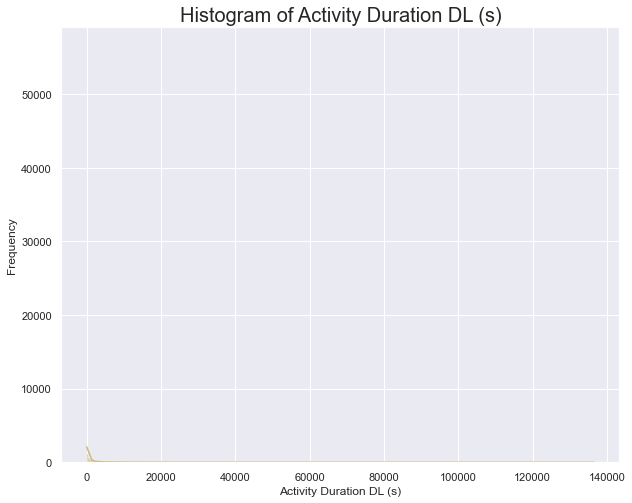

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


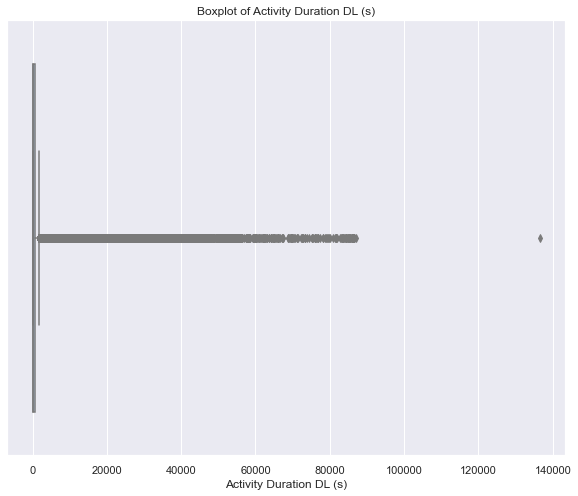

In [87]:
uniAnalysis.vizualiseHist('Activity Duration DL (s)','y')

In [88]:
uniAnalysis.calculateDispersion('Activity Duration DL (s)')

Calculating dispersion stats for Activity Duration DL (s)
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,14.87800
Q2,39.30500
Q3,679.61100
Std deviation,5696.35749
IQR,664.73300
Max Value,136536.46100
Min Value,0.00000


## Handset Manufacturer

In [89]:
data['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Sonaki Co

This list all manufacturers whose devices are being used to log into sessions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


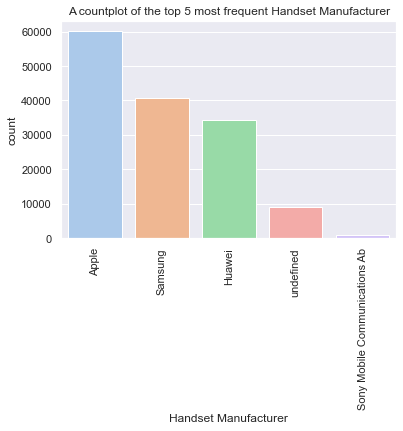

In [90]:
uniAnalysis.visualiseCount('Handset Manufacturer',5)

This gives us the top 5 handset manufacturers whose handsets have been used to access the internt sessions. Apple leads the way ahead of Samsung ,Huawei and Sony Mobile Communications Ab 

## Handset Type

In [91]:
data['Handset Type'].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


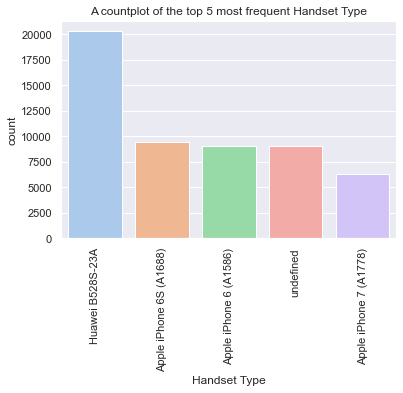

In [92]:
uniAnalysis.visualiseCount('Handset Type',5)

# Bivariate Analysis

## Social Media

In [93]:
def scatter(data,col1,col2):
    sns.scatterplot(data=data,x=col1,y=col2,palette='rocket')

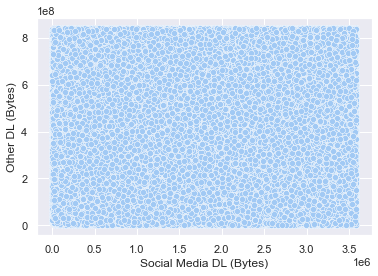

In [94]:
scatter(data,'Social Media DL (Bytes)','Other DL (Bytes)')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

Text(0.5, 1.0, '')

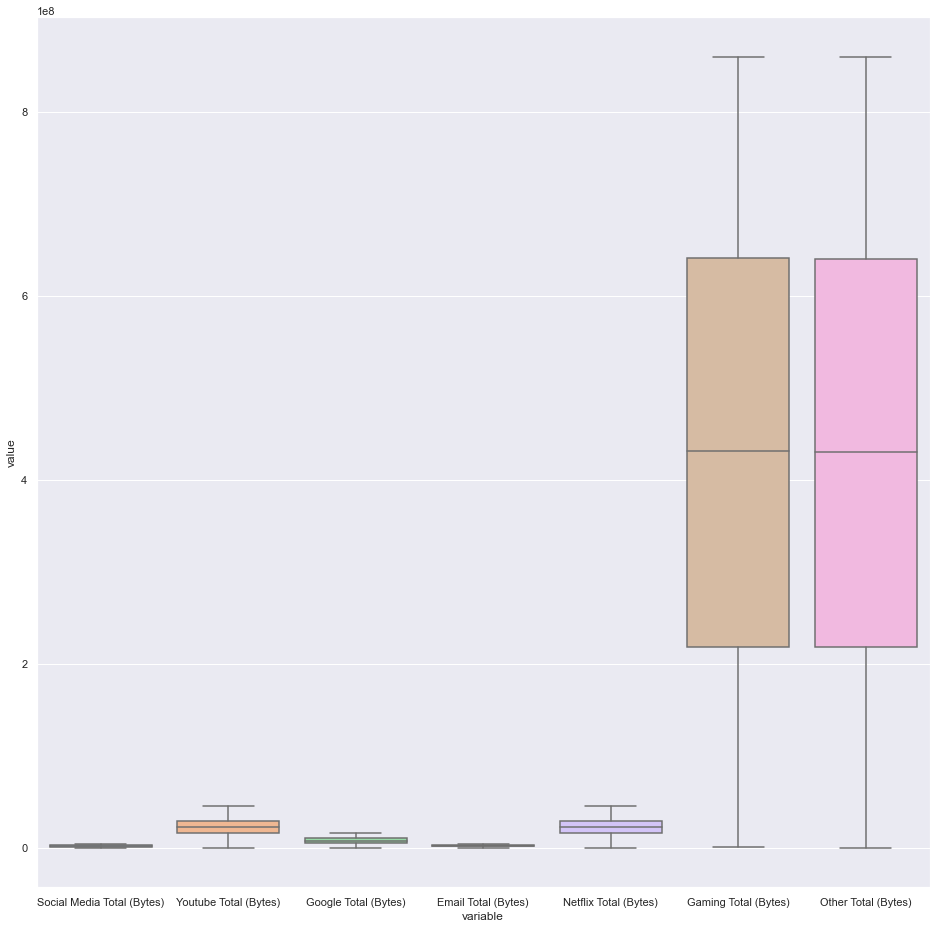

In [96]:
appUpload=pd.DataFrame(data=data,columns=['Social Media Total (Bytes)','Youtube Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)'])

plt.figure(figsize=(16,16))
sns.boxplot(data=pd.melt(appUpload),x="variable",y='value')
plt.title("")



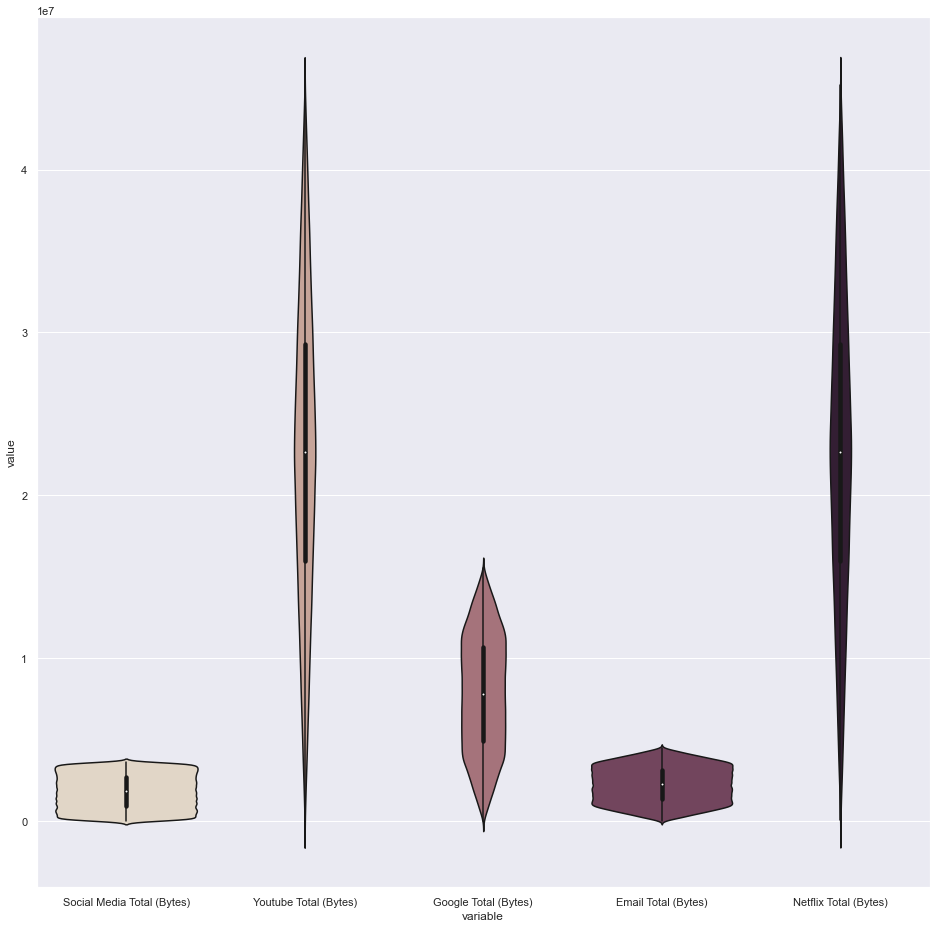

In [97]:
appUpload=pd.DataFrame(data=data,columns=['Social Media Total (Bytes)','Youtube Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Netflix Total (Bytes)'])
plt.figure(figsize=(16,16))
sns.violinplot(x="variable", y="value",data=pd.melt(appUpload),palette="ch:.25")

In [98]:
data['Total Session (Mbs)']=(data['Social Media Total (Bytes)']+data['Youtube Total (Bytes)']+data['Google Total (Bytes)']+data['Email Total (Bytes)']+data['Netflix Total (Bytes)']+data['Other Total (Bytes)']+data['Gaming Total (Bytes)'])/(1024*1024)

In [99]:
data['Total Session (Mbs)'].describe()

count    150001.000000
mean        874.390774
std         328.344500
min          55.658620
25%         638.931883
50%         874.576234
75%        1110.346406
max        1698.183458
Name: Total Session (Mbs), dtype: float64

In [100]:
bins=['Low Usage','Moderate Usage','High Usage','Extreme Usage','Outlier']
data['five Class']=pd.qcut(data['Total Session (Mbs)'],q=[0,.2,.4,.6,.8,1],labels=bins)

In [101]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Month,Day,Year,Hour,Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total Session (Mbs),five Class
0,13114483460844900352,2019-04-04 12:01:18.000000000,770.0000,2019-04-25 14:35:31.000000000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,4,4,2019,12,0.022461,0.042969,37.624000,38.787000,493.406131,Low Usage
1,13114483482878900224,2019-04-09 13:04:04.000000000,235.0000,2019-04-25 08:15:48.000000000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,4,9,2019,13,0.015625,0.025391,0.168000,3.560000,1176.919550,Outlier
2,13114483484080500736,2019-04-09 17:42:11.000000000,1.0000,2019-04-25 11:58:13.000000000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4,9,2019,17,0.005859,0.008789,0.000000,0.000000,685.103951,Moderate Usage
3,13114483485442799616,2019-04-10 00:31:25.000000000,486.0000,2019-04-25 07:36:35.000000000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,4,10,2019,0,0.042969,0.042969,3.330000,37.882000,1562.493020,Outlier
4,13114483499480700928,2019-04-12 20:10:23.000000000,565.0000,2019-04-25 10:40:32.000000000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4,12,2019,20,0.005859,0.008789,0.000000,0.000000,1104.727653,Extreme Usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,4,29,2019,7,0.050781,0.063477,42.376000,41.915000,605.648632,Moderate Usage
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,4,29,2019,7,0.022461,0.052734,17.264000,16.759000,1352.276146,Outlier
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,4,29,2019,7,0.041992,0.045898,25.003000,28.640000,714.110837,Moderate Usage
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,4,29,2019,7,0.033203,0.036133,13.405000,34.088000,1159.892205,Extreme Usage


In [102]:
bins=['Outlier','Extremely Low','Moderately Low','Low Usage','Moderate Usage','Okay Usage','High Usage','Moderately High Usage','Extreme High Usage','Outlier']
data['Decile Class']=pd.qcut(data['Total Session (Mbs)'],q=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],labels=False)

In [103]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Day,Year,Hour,Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total Session (Mbs),five Class,Decile Class
0,13114483460844900352,2019-04-04 12:01:18.000000000,770.0000,2019-04-25 14:35:31.000000000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,4,2019,12,0.022461,0.042969,37.624000,38.787000,493.406131,Low Usage,1
1,13114483482878900224,2019-04-09 13:04:04.000000000,235.0000,2019-04-25 08:15:48.000000000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,9,2019,13,0.015625,0.025391,0.168000,3.560000,1176.919550,Outlier,8
2,13114483484080500736,2019-04-09 17:42:11.000000000,1.0000,2019-04-25 11:58:13.000000000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,9,2019,17,0.005859,0.008789,0.000000,0.000000,685.103951,Moderate Usage,2
3,13114483485442799616,2019-04-10 00:31:25.000000000,486.0000,2019-04-25 07:36:35.000000000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,10,2019,0,0.042969,0.042969,3.330000,37.882000,1562.493020,Outlier,9
4,13114483499480700928,2019-04-12 20:10:23.000000000,565.0000,2019-04-25 10:40:32.000000000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,12,2019,20,0.005859,0.008789,0.000000,0.000000,1104.727653,Extreme Usage,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,29,2019,7,0.050781,0.063477,42.376000,41.915000,605.648632,Moderate Usage,2
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,29,2019,7,0.022461,0.052734,17.264000,16.759000,1352.276146,Outlier,9
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,29,2019,7,0.041992,0.045898,25.003000,28.640000,714.110837,Moderate Usage,3
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,29,2019,7,0.033203,0.036133,13.405000,34.088000,1159.892205,Extreme Usage,7


In [104]:
data['Decile Class'].unique()

array([1, 8, 2, 9, 7, 5, 6, 3, 4, 0], dtype=int64)

In [105]:
vals=['Outlier','Extremely Low','Moderately Low','Low Usage','Moderate Usage','Okay Usage','High Usage','Moderately High Usage','Extreme High Usage']

bins = [0,1,2,3,4,5,6,7,8,9]

data['Decile Class Category'] = pd.cut(data['Decile Class'], bins, labels=vals,ordered=False)

In [106]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Year,Hour,Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total Session (Mbs),five Class,Decile Class,Decile Class Category
0,13114483460844900352,2019-04-04 12:01:18.000000000,770.0000,2019-04-25 14:35:31.000000000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2019,12,0.022461,0.042969,37.624000,38.787000,493.406131,Low Usage,1,Outlier
1,13114483482878900224,2019-04-09 13:04:04.000000000,235.0000,2019-04-25 08:15:48.000000000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2019,13,0.015625,0.025391,0.168000,3.560000,1176.919550,Outlier,8,Moderately High Usage
2,13114483484080500736,2019-04-09 17:42:11.000000000,1.0000,2019-04-25 11:58:13.000000000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2019,17,0.005859,0.008789,0.000000,0.000000,685.103951,Moderate Usage,2,Extremely Low
3,13114483485442799616,2019-04-10 00:31:25.000000000,486.0000,2019-04-25 07:36:35.000000000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2019,0,0.042969,0.042969,3.330000,37.882000,1562.493020,Outlier,9,Extreme High Usage
4,13114483499480700928,2019-04-12 20:10:23.000000000,565.0000,2019-04-25 10:40:32.000000000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,2019,20,0.005859,0.008789,0.000000,0.000000,1104.727653,Extreme Usage,7,High Usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,2019,7,0.050781,0.063477,42.376000,41.915000,605.648632,Moderate Usage,2,Extremely Low
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2019,7,0.022461,0.052734,17.264000,16.759000,1352.276146,Outlier,9,Extreme High Usage
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2019,7,0.041992,0.045898,25.003000,28.640000,714.110837,Moderate Usage,3,Moderately Low
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,2019,7,0.033203,0.036133,13.405000,34.088000,1159.892205,Extreme Usage,7,High Usage


In [107]:
data.groupby(['five Class'])['Total Session (Mbs)'].sum()

five Class
Low Usage         1.227063e+07
Moderate Usage    2.070342e+07
High Usage        2.624541e+07
Extreme Usage     3.177160e+07
Outlier           4.016843e+07
Name: Total Session (Mbs), dtype: float64

In [108]:
data.groupby(['Decile Class'])['Total Session (Mbs)'].sum().sort_values(ascending=False)[:5]

Decile Class
9    2.157279e+07
8    1.859565e+07
7    1.667296e+07
6    1.509864e+07
5    1.374467e+07
Name: Total Session (Mbs), dtype: float64

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [110]:
appData=data[['Social Media Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Youtube Total (Bytes)','Netflix Total (Bytes)','Gaming Total (Bytes)','Other Total (Bytes)']]


In [111]:
appData

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...
149996,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


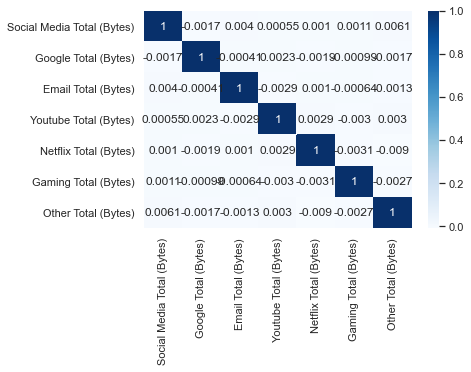

In [112]:
sns.heatmap(appData.corr(),annot=True,cmap="Blues")

In [113]:
data.to_csv('../data/processed_data.csv',index=False)

In [114]:
#We drop columns we wouldn't require and onehot-encode the categorical ones
colsDrop=['Bearer Id','Start','Start ms','End','End ms', 'IMSI','IMEI','MSISDN/Number','Last Location Name']
catDummies=['Handset Manufacturer','Handset Type','five Class','Decile Class Category']

data.drop(labels=colsDrop,axis=1,inplace=True)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Dur. (ms)                       150001 non-null  float64 
 1   Avg RTT DL (ms)                 150001 non-null  float64 
 2   Avg RTT UL (ms)                 150001 non-null  float64 
 3   Avg Bearer TP DL (kbps)         150001 non-null  float64 
 4   Avg Bearer TP UL (kbps)         150001 non-null  float64 
 5   DL TP < 50 Kbps (%)             150001 non-null  float64 
 6   50 Kbps < DL TP < 250 Kbps (%)  150001 non-null  float64 
 7   250 Kbps < DL TP < 1 Mbps (%)   150001 non-null  float64 
 8   DL TP > 1 Mbps (%)              150001 non-null  float64 
 9   UL TP < 10 Kbps (%)             150001 non-null  float64 
 10  10 Kbps < UL TP < 50 Kbps (%)   150001 non-null  float64 
 11  50 Kbps < UL TP < 300 Kbps (%)  150001 non-null  float64 
 12  UL

In [116]:
data=pd.get_dummies(data=data,columns=['Handset Manufacturer','Handset Type','five Class','Decile Class Category'])

In [117]:
data

,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),...,five Class_Outlier,Decile Class Category_Outlier,Decile Class Category_Extremely Low,Decile Class Category_Moderately Low,Decile Class Category_Low Usage,Decile Class Category_Moderate Usage,Decile Class Category_Okay Usage,Decile Class Category_High Usage,Decile Class Category_Moderately High Usage,Decile Class Category_Extreme High Usage
0,1.823652e+06,42.000000,5.000000,23.000000,44.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,1,0,0,0,0,0,0,0,0
1,1.365104e+06,65.000000,5.000000,16.000000,26.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,1,0,0,0,0,0,0,0,1,0
2,1.361762e+06,109.795706,17.662883,6.000000,9.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,0,1,0,0,0,0,0,0,0
3,1.321509e+06,109.795706,17.662883,44.000000,44.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,1,0,0,0,0,0,0,0,0,1
4,1.089009e+06,109.795706,17.662883,6.000000,9.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,8.123000e+04,32.000000,0.000000,52.000000,65.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,0,1,0,0,0,0,0,0,0
149997,9.797000e+04,27.000000,2.000000,23.000000,54.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,1,0,0,0,0,0,0,0,0,1
149998,9.824900e+04,43.000000,6.000000,43.000000,47.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,0,0,1,0,0,0,0,0,0
149999,9.791000e+04,37.000000,5.000000,34.000000,37.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,0,0,0,0,0,0,0,1,0,0


In [125]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

standardData=ss.fit_transform(data)



In [126]:
standardData

array([[21.21304733, -0.12120645, -0.16546369, ..., -0.3333321 ,
        -0.3333321 , -0.3333321 ],
       [15.55455133, -0.08008661, -0.16546369, ..., -0.3333321 ,
         3.00001111, -0.3333321 ],
       [15.51331095,  0.        ,  0.        , ..., -0.3333321 ,
        -0.3333321 , -0.3333321 ],
       ...,
       [-0.07847716, -0.11941863, -0.15239686, ..., -0.3333321 ,
        -0.3333321 , -0.3333321 ],
       [-0.08266043, -0.13014554, -0.16546369, ...,  3.00001111,
        -0.3333321 , -0.3333321 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.3333321 ,
        -0.3333321 , -0.3333321 ]])

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaData=pca.fit_transform(standardData)


We choose to reduce the data to hold 95 % of its variance from the original dataset

In [133]:
pca.explained_variance_

array([9.21710557, 6.57099769])

In [134]:
pca.explained_variance_ratio_

array([0.0056581 , 0.00403373])

In [131]:
from sklearn.cluster import KMeans

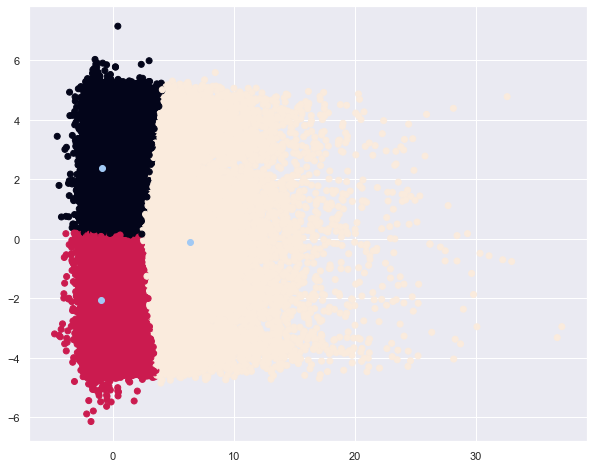

In [139]:
kmean=KMeans(n_clusters=3)
pred=kmean.fit_predict(pcaData)
plt.figure(figsize=(10,8))
plt.scatter(pcaData[:,0],pcaData[:,1],c=pred)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1])
plt.show()

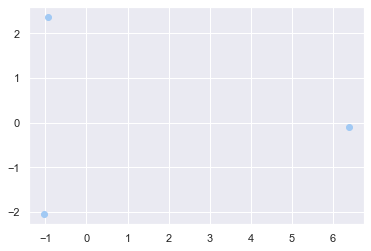

In [137]:
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1])
plt.show()